<a href="https://colab.research.google.com/github/0x6f736f646f/AI_LABS/blob/master/QuantumMachineLearning/1quantum_circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install qiskit

  Using cached https://files.pythonhosted.org/packages/18/2f/63ee86a48d131f0d6772ed9aba947d2e8457d17408add32c1d0d44822c84/qiskit_aer-0.3.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/97/1be77cc1b22f3bd341024b1bae89d71ca9ee147ac047f793364cadc873a8/qiskit_terra-0.10.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/62/18/4c6a895c925e8822e72535d774861e9ca07089c4b938ed20002b1aaab66a/nest_asyncio-1.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/43/71/8bfa882b9c502c36e5c9ef6732969533670d2b039cbf95a82ced8f762b80/websockets-7.0-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/a4/a6/42f17d065bda1fac255db13afc94c93dbfb64393eae37c749b4cb0752fc7/more_itertools-5.0.0-py3-none-any.whl
  Found existing installation: qiskit-aer 0.3.4
    Uninstalling qiskit-aer-0.3.4:
      Successfully uninstalled

## Getting started with qiskit
Here we will get the overview of qiskit and build a fundamental unit of qiskit, quantum circuit.
We need to build the execute

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
# We create q quantum circuit on a quantum register with 4 qubits
circuit = QuantumCircuit(4)

We can now add gates to manipulate the register.
eg Hadamard, Controlled not 

In [3]:
# we have added a Hadamard gate to the first qubit (Superposition)
circuit.h(0)
# we add a CNOT gate on 0 and 1 (Bell state)
circuit.cx(0,1)
# CNOT on 0 and 2
circuit.cx(0,2)

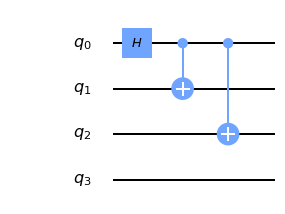

In [4]:
# Lets see what we have made
circuit.draw()

Note: If you don't have matplotlib set up as your default in '~/.qiskit/settings.conf' it will use a text-based drawer over matplotlib. To set the default to matplotlib, use the following in the settings.conf
[default]
circuit_drawer = mpl

## Simulating circuit using qiskit Aer which provides many backends
We will use `statevector_simulator` which is the most common which returns quantum states 

In [5]:
from qiskit import Aer

# Run the circuit
backend = Aer.get_backend('statevector_simulator')

#Create execution
job = execute(circuit, backend)

In [6]:
#Monitor our job with
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [7]:
# get results
result = job.result()

In [8]:
outputs = result.get_statevector(circuit)
print(outputs)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


## OpenQASM backend
It provides information about the state output by the ideal circuit and the matrix representation of the circuit

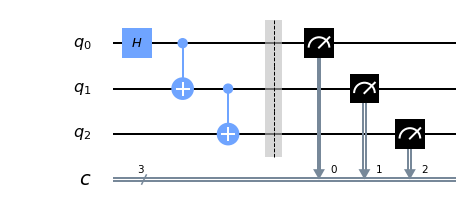

In [9]:
circuit1 = QuantumCircuit(3,3)
circuit1.h(0)
circuit1.cx(0,1)
circuit1.cx(1,2)
circuit1.barrier(range(3))
# map quantum measurements to the classical bits
circuit1.measure(range(3), range(3))
circuit1.draw()

In [10]:
backend2 = Aer.get_backend('qasm_simulator')
# we repeate the circuit 2048 times
job2 = execute(circuit1, backend2, shots= 2048)
result2 = job2.result()

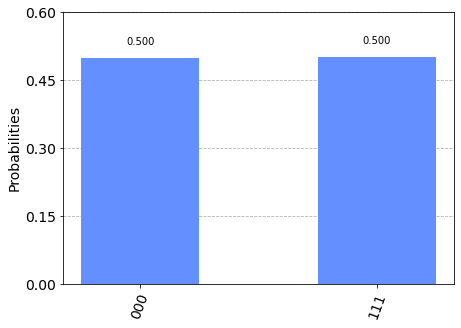

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(result2.get_counts(circuit1))

## Running on IBMQ

In [12]:
from qiskit import IBMQ

After generating your API token, call: IBMQ.save_account('MY_TOKEN').

This will store your IBM Q credentials in a local file.

In [13]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [15]:
provider = IBMQ.get_provider(group='open')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [16]:
backend3 = provider.get_backend('ibmq_16_melbourne')

In [17]:
from qiskit.tools.monitor import job_monitor

job3 = execute(circuit1, backend=backend3)
job_monitor(job3)

Job Status: job has successfully run


In [18]:
result3 = job3.result()

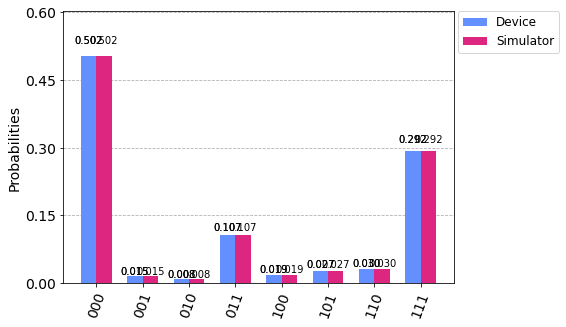

In [19]:
counts3= result3.get_counts(circuit1)
plot_histogram([counts3,result3.get_counts(circuit1)], legend=['Device', 'Simulator'])

In [20]:
backend4 = provider.get_backend('ibmq_qasm_simulator')

In [21]:
job4 = execute(circuit1, backend=backend4)

In [22]:
result4 = job4.result()

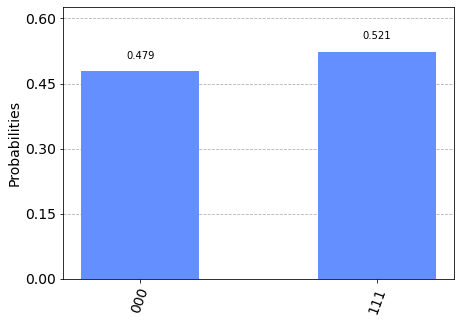

In [24]:
counts4 = result4.get_counts(circuit1)
plot_histogram(counts4)